### According to section 3.3, Connection to SGD WITH MOMENTUM, it's easier to tune the parameters if we write the update rule of SGHMC in the following way.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
def sghmc_vectorNew(gradU, eta, L, alpha, x, V):
    beta = 0.5 * V * eta
    p = np.random.randn(len(x)) * np.sqrt( eta )
    momentum = 1. - alpha
    try:
        sigma = np.sqrt( 2. * eta * (alpha-beta) )
    except:
        print('eta too big')
    for i in range(L):
        p = p * momentum - gradU( x ) * eta + np.random.randn(len(p)) * sigma
        x += p
    return x.copy()

In [3]:
def U(x):
    sigma = np.array([[1.,0.9],[0.9,1.]])
    return 0.5 * x.dot( np.linalg.solve(sigma,x))

def gradU_vector(x):
    mean = np.zeros_like(x)
    sigma = np.array([[1.,0.9],[0.9,1.]])
    return np.linalg.solve(sigma,x) + np.random.randn(len(x))
    
    

In [4]:
xGrid = np.linspace(-2., 3., 200)
yGrid = np.linspace(-2., 3., 200)

XGrid, YGrid = np.meshgrid(xGrid, yGrid)

Z = np.zeros((xGrid.shape[0], yGrid.shape[0]))
for i in range(xGrid.shape[0]):
    for j in range(yGrid.shape[0]):
        Z[i,j] = np.exp(-U(np.array([xGrid[i],yGrid[j]])))

In [5]:
nsample = 8000
V = 1
etaSGHMC = 0.05
alpha = 0.035
L = 50


In [7]:
samples = []
x = np.array([0.,0.])
for i in range(nsample):
    x = sghmc_vectorNew( gradU_vector, etaSGHMC, L, alpha, x, V )
    samples.append(x.copy())

(-2, 3)

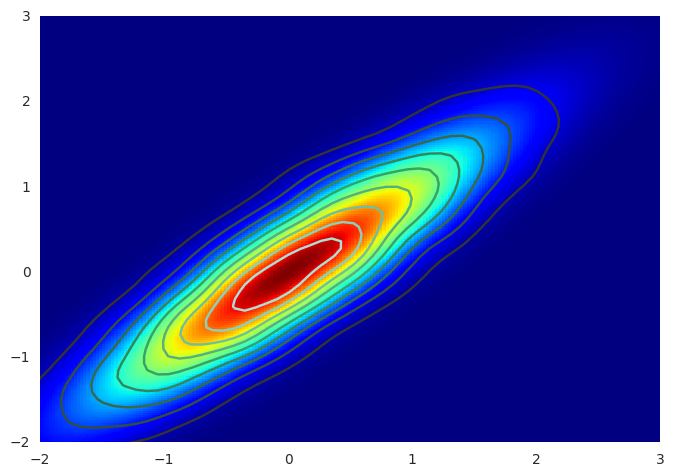

In [8]:
import seaborn as sns

samples = np.array(samples)

plt.pcolor(XGrid, YGrid, Z, cmap='jet')
sns.kdeplot(samples[:,0],samples[:,1])
plt.xlim(-2,3)
plt.ylim(-2,3)